In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,276 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155219 files and d

In [3]:
import pandas as pd
import numpy as np
import warnings

In [8]:
# 경고 끄기
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

In [9]:
full_data = pd.read_csv('/content/drive/MyDrive/응통2021/추가 데이터/full_dataset_lag10.csv')

In [10]:
del full_data['Unnamed: 0']

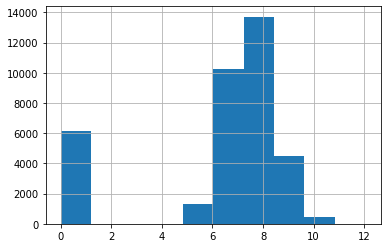

In [7]:
np.log1p(full_data['1_week']).hist()

In [ ]:
temp = full_data.drop(['month_avg', 'sun_Qy', 'hum'], axis=1)

In [ ]:
temp.head(3)

,date,요일,품목,가격,거래량,주산지,경유가격,농산물,temp,max_Temp,min_Temp,wind,rain,dif_Temp,p_lag_1,q_lag_1,p_lag_2,q_lag_2,p_lag_3,q_lag_3,p_lag_4,q_lag_4,p_lag_5,q_lag_5,p_lag_6,q_lag_6,p_lag_7,q_lag_7,p_lag_8,q_lag_8,p_lag_9,q_lag_9,p_lag_10,q_lag_10,p_ewma,q_ewma,month,1_week,2_week,4_week
0,2016-01-01,금요일,배추,0.0,0.0,전남,1191.69,101.55,2.700000,9.300000,-3.300000,0.366667,0.033333,12.600000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,1.0,420.0,449.0,625.0
1,2016-01-02,토요일,배추,329.0,80860.0,전남,1190.58,101.55,6.133333,13.800000,0.233333,0.333333,0.000000,13.566667,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.476190,-0.476190,1.0,389.0,454.0,733.0
2,2016-01-03,일요일,배추,0.0,0.0,전남,1189.58,101.55,6.666667,15.233333,2.133333,0.333333,0.000000,13.100000,329.0,80860.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,119.966767,29558.791541,1.0,0.0,0.0,1048.0


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
def ols(dataset, pum):
    tmp = dataset[dataset['품목'] == pum]
    tmp.fillna(method='ffill', inplace=True)
    tmp_train = tmp[:-365]
    tmp_test = tmp[-365:]
    tmp_x = tmp_train[['가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp']]
    tmp_y = tmp_train[['1_week']]
    model = sm.OLS(np.log1p(tmp_y),tmp_x)
    t = model.fit()
    print(t.summary())
    pred = t.predict(tmp_test[['가격', '거래량', '경유가격', '농산물', 'temp', 'wind','rain', 'dif_Temp', 'max_Temp', 'min_Temp']])
    pred= np.expm1(pred)
    df_price = pd.concat([pred, tmp_test[['1_week']]], axis=1)
    df_price.columns = ['pred', 'true']
    nmae(df_price)
    plt.plot(pred, label='pred')
    plt.plot(tmp_test[['1_week']], label='true')
    plt.legend()
    plt.show()
    


In [ ]:
def nmae(df_price):

    df8 = df_price.query('true != 0')  # 실제 가격 값이 0인 행 제거
    true = df8['true']
    pred = df8['pred']
    score = np.absolute(np.subtract(true, pred))/true
    score = score.mean()
    print('NMAE : {}'.format(score))

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              1561.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:07   Log-Likelihood:                         -2706.7
No. Observations:                1368   AIC:                                      5431.
Df Residuals:                    1359   BIC:                                      5478.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

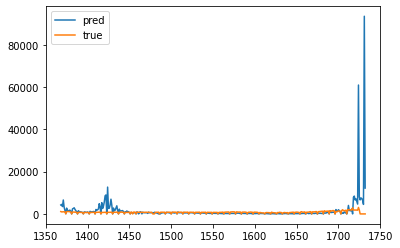

In [ ]:
ols(temp, '배추')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2429.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:07   Log-Likelihood:                         -2466.2
No. Observations:                1368   AIC:                                      4950.
Df Residuals:                    1359   BIC:                                      4997.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

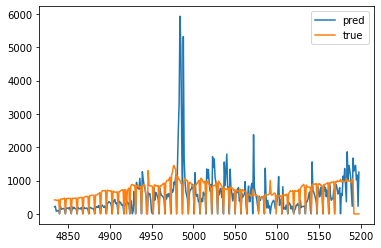

In [ ]:
ols(temp, '양파')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.871
Method:                 Least Squares   F-statistic:                              1026.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:07   Log-Likelihood:                         -3445.3
No. Observations:                1368   AIC:                                      6909.
Df Residuals:                    1359   BIC:                                      6956.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

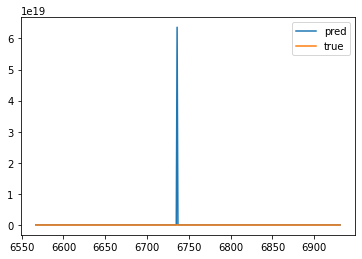

In [ ]:
ols(temp, '건고추')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              2789.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:08   Log-Likelihood:                         -2698.1
No. Observations:                1368   AIC:                                      5414.
Df Residuals:                    1359   BIC:                                      5461.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

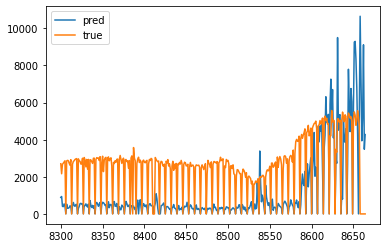

In [ ]:
ols(temp, '마늘')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              2449.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:08   Log-Likelihood:                         -2583.6
No. Observations:                1368   AIC:                                      5185.
Df Residuals:                    1359   BIC:                                      5232.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

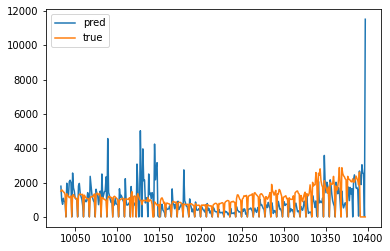

In [ ]:
ols(temp, '대파')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2420.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:08   Log-Likelihood:                         -2524.1
No. Observations:                1368   AIC:                                      5066.
Df Residuals:                    1359   BIC:                                      5113.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

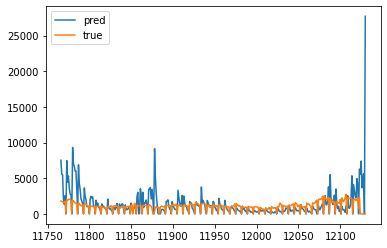

In [ ]:
ols(temp, '얼갈이배추')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              2449.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:08   Log-Likelihood:                         -2809.4
No. Observations:                1368   AIC:                                      5637.
Df Residuals:                    1359   BIC:                                      5684.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

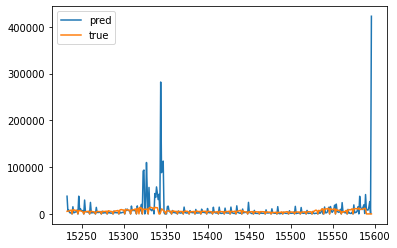

In [ ]:
ols(temp, '깻잎')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              1717.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:09   Log-Likelihood:                         -2914.4
No. Observations:                1368   AIC:                                      5847.
Df Residuals:                    1359   BIC:                                      5894.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

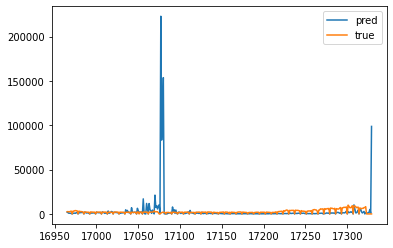

In [ ]:
ols(temp, '시금치')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1851.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:09   Log-Likelihood:                         -2849.1
No. Observations:                1368   AIC:                                      5716.
Df Residuals:                    1359   BIC:                                      5763.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

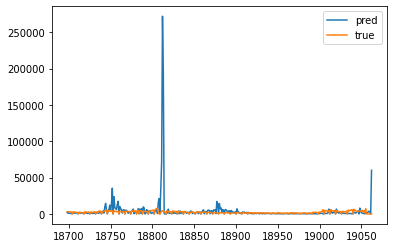

In [ ]:
ols(temp, '미나리')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              2359.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:09   Log-Likelihood:                         -2756.3
No. Observations:                1368   AIC:                                      5531.
Df Residuals:                    1359   BIC:                                      5578.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

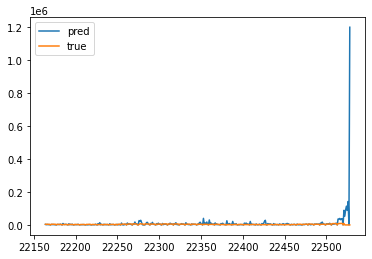

In [ ]:
ols(temp, '파프리카')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2413.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:10   Log-Likelihood:                         -2683.2
No. Observations:                1368   AIC:                                      5384.
Df Residuals:                    1359   BIC:                                      5431.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

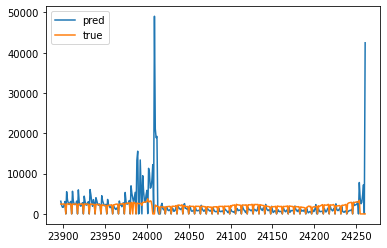

In [ ]:
ols(temp, '새송이')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              2879.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:10   Log-Likelihood:                         -2503.8
No. Observations:                1368   AIC:                                      5026.
Df Residuals:                    1359   BIC:                                      5073.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

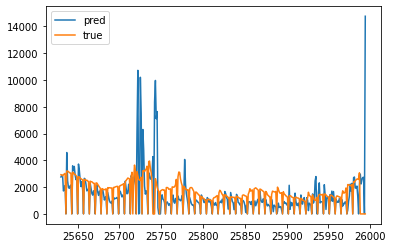

In [ ]:
ols(temp, '팽이버섯')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              2115.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:10   Log-Likelihood:                         -2744.8
No. Observations:                1368   AIC:                                      5508.
Df Residuals:                    1359   BIC:                                      5555.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

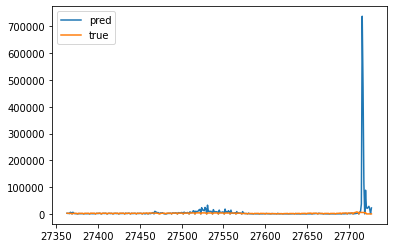

In [ ]:
ols(temp, '토마토')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                              2444.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:10   Log-Likelihood:                         -2705.5
No. Observations:                1368   AIC:                                      5429.
Df Residuals:                    1359   BIC:                                      5476.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

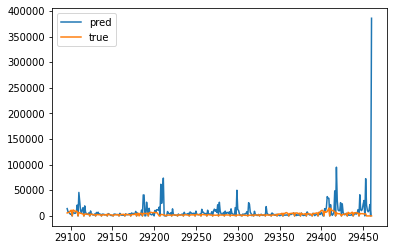

In [ ]:
ols(temp, '청상추')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              2078.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:11   Log-Likelihood:                         -2728.9
No. Observations:                1368   AIC:                                      5476.
Df Residuals:                    1359   BIC:                                      5523.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

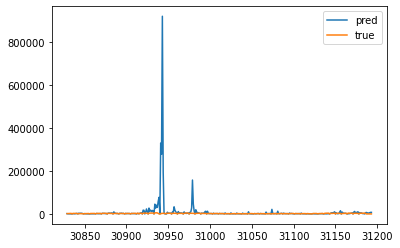

In [ ]:
ols(temp, '백다다기')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              2132.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:11   Log-Likelihood:                         -2712.0
No. Observations:                1368   AIC:                                      5442.
Df Residuals:                    1359   BIC:                                      5489.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

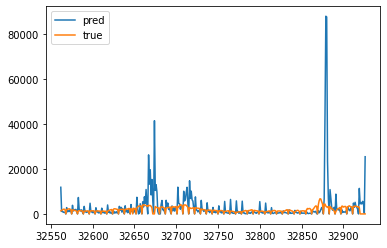

In [ ]:
ols(temp, '애호박')

                                 OLS Regression Results                                
Dep. Variable:                 1_week   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              1160.
Date:                Sat, 13 Nov 2021   Prob (F-statistic):                        0.00
Time:                        02:44:11   Log-Likelihood:                         -3201.0
No. Observations:                1368   AIC:                                      6420.
Df Residuals:                    1359   BIC:                                      6467.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

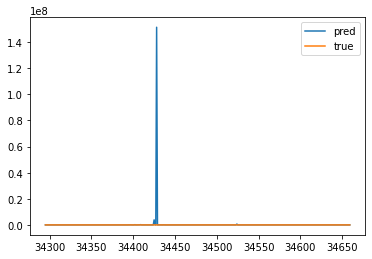

In [ ]:
ols(temp, '캠벨얼리')